In [ ]:
import matplotlib.pyplot as plt
import networkx
import littleballoffur as lbf
from collections import Counter

In [3]:
nodes = 5000
m = 2
smpl_percentage = 0.15
original = networkx.barabasi_albert_graph(nodes, 2)

In [4]:
# random node sampling
sampler = lbf.RandomNodeSampler(number_of_nodes=int(nodes*smpl_percentage))
random_node_sampling = sampler.sample(original)

# random edge sampling
sampler = lbf.RandomEdgeSampler(number_of_edges=int(nodes*smpl_percentage*1.2)//2)
random_edge_sampling = sampler.sample(original)

# snowball sampling
sampler = lbf.SnowBallSampler(number_of_nodes=int(nodes*smpl_percentage))
snowball_sampling = sampler.sample(original)

In [5]:
# degree sequences
# random node sampling
degree_sequences_rns = sorted((d for n, d in random_node_sampling.degree()), reverse=True)
degree_sequences_counts_rns = Counter(degree_sequences_rns)
degree_array_rns = []
degree_count_array_rns = []

for _ in degree_sequences_counts_rns.items():
    degree_array_rns.append(_[0])
    degree_count_array_rns.append(_[1])

In [6]:
# random edge sampling
degree_sequences_res = sorted((d for n, d in random_edge_sampling.degree()), reverse=True)
degree_sequences_counts_res = Counter(degree_sequences_res)
degree_array_res = []
degree_count_array_res = []

for _ in degree_sequences_counts_res.items():
    degree_array_res.append(_[0])
    degree_count_array_res.append(_[1])

In [7]:
# snowball sampling
degree_sequences_sns = sorted((d for n, d in snowball_sampling.degree()), reverse=True)
degree_sequences_counts_sns = Counter(degree_sequences_sns)
degree_array_sns = []
degree_count_array_sns = []

for _ in degree_sequences_counts_sns.items():
    degree_array_sns.append(_[0])
    degree_count_array_sns.append(_[1])

In [8]:
# each sample statistics
print(f"Random Node Sampling: {len(random_node_sampling.nodes())} nodes, {len(random_node_sampling.edges())} edges")
print(f"Random Edge Sampling: {len(random_edge_sampling.nodes())} nodes, {len(random_edge_sampling.edges())} edges")
print(f"Snowball Sampling: {len(snowball_sampling.nodes())} nodes, {len(snowball_sampling.edges())} edges")

Random Node Sampling: 750 nodes, 221 edges
Random Edge Sampling: 751 nodes, 450 edges
Snowball Sampling: 750 nodes, 1084 edges


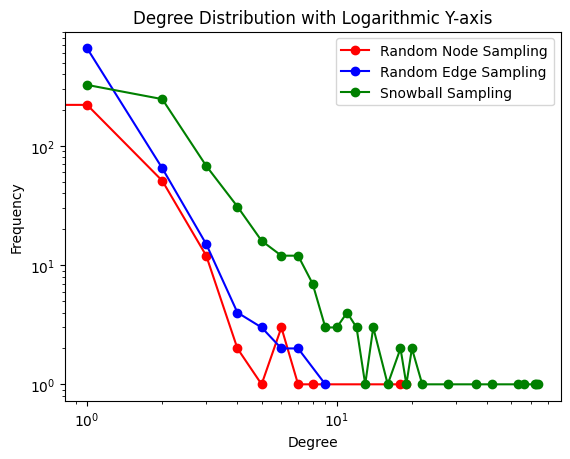

In [9]:
# plotting the degree distributions
plt.plot(degree_array_rns, degree_count_array_rns, 'ro-')
plt.plot(degree_array_res, degree_count_array_res, 'bo-')
plt.plot(degree_array_sns, degree_count_array_sns, 'go-')

plt.legend(['Random Node Sampling', 'Random Edge Sampling', 'Snowball Sampling'])


plt.yscale('log')
plt.xscale('log')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution with Logarithmic Y-axis')

plt.show()
